In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df1 = df.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
df1['target'] = iris.target
df1[80:90]

,petal length (cm),petal width (cm),target
80,3.8,1.1,1
81,3.7,1.0,1
82,3.9,1.2,1
83,5.1,1.6,1
84,4.5,1.5,1
85,4.5,1.6,1
86,4.7,1.5,1
87,4.4,1.3,1
88,4.1,1.3,1
89,4.0,1.3,1


In [9]:
df1['flower_name'] =df1.target.apply(lambda x: iris.target_names[x])
df1.head()

,petal length (cm),petal width (cm),target,flower_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


Text(0, 0.5, 'petal width')

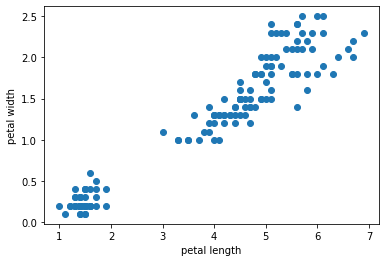

In [10]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [12]:
from sklearn.cluster import KMeans


In [13]:
km = KMeans(n_clusters=2)    
y_predicted = km.fit_predict(df1[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
df1['cluster'] = y_predicted
df1.head()

,petal length (cm),petal width (cm),target,flower_name,cluster
0,1.4,0.2,0,setosa,0
1,1.4,0.2,0,setosa,0
2,1.3,0.2,0,setosa,0
3,1.5,0.2,0,setosa,0
4,1.4,0.2,0,setosa,0


In [16]:
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

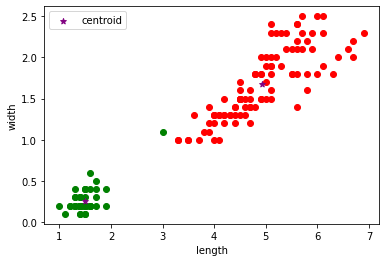

In [17]:
df2 = df1[df1.cluster==0]
df3 = df1[df1.cluster==1]
#df4 = df1[df1.cluster==2]
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')
#plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()

In [20]:
sse = []

k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

# 
so it is showing 3 clusters would have been better(plot is at the end of page(shifted from here))

so we have already know the plot for 3 clusters so lets check will any scaling improve it more or not

# preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df1[['petal width (cm)']])
df1['petal width (cm)'] = scaler.transform(df1[['petal width (cm)']])

scaler.fit(df1[['petal length (cm)']])
df1['petal length (cm)'] = scaler.transform(df1[['petal length (cm)']])

In [23]:
df1.head()

,petal length (cm),petal width (cm),target,flower_name,cluster
0,0.067797,0.041667,0,setosa,0
1,0.067797,0.041667,0,setosa,0
2,0.050847,0.041667,0,setosa,0
3,0.084746,0.041667,0,setosa,0
4,0.067797,0.041667,0,setosa,0


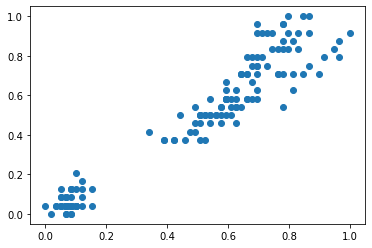

In [24]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])

In [25]:
km = KMeans(n_clusters=3)    
y_predicted = km.fit_predict(df1[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
df1['cluster']=y_predicted
df1.head()

,petal length (cm),petal width (cm),target,flower_name,cluster
0,0.067797,0.041667,0,setosa,1
1,0.067797,0.041667,0,setosa,1
2,0.050847,0.041667,0,setosa,1
3,0.084746,0.041667,0,setosa,1
4,0.067797,0.041667,0,setosa,1


In [27]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

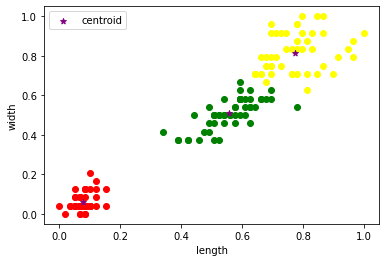

In [29]:
df3 = df1[df1.cluster==0]
df4 = df1[df1.cluster==1]
df5 = df1[df1.cluster==2]
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='green')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='red')
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()

In [30]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

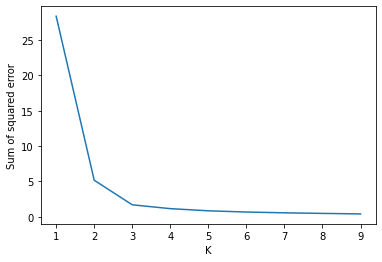

In [31]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# so you can see little bit more predefined elbow structure 

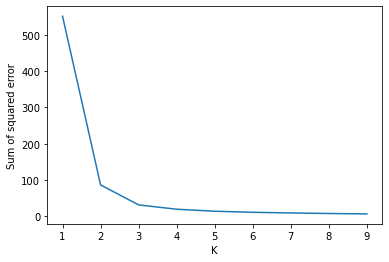

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)                   # i shifted the above plot here for understanding